In [2]:
# Import the pandas library, our main tool for data manipulation
import pandas as pd

# Load the dataset from the CSV file into a pandas DataFrame
# A DataFrame is like a smart spreadsheet in Python
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Display the first 5 rows of our dataset to see what it looks like
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Import our visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotalCharges' to a numeric type, forcing errors (like empty spaces) into NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any new missing values created
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Fill missing values with 0 (you could also use the mean or median)
df.dropna(inplace=True)

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Missing values in TotalCharges: 11
Number of duplicate rows: 0


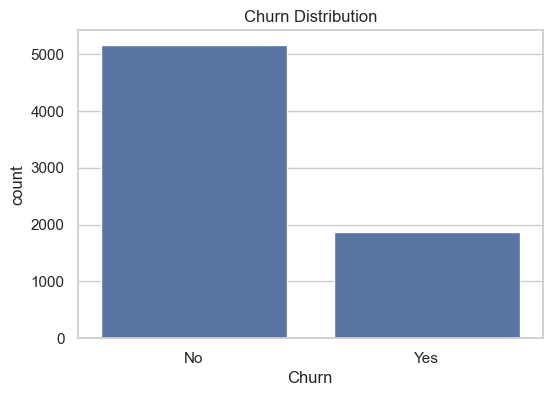

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
# Set the visual style of the plots
sns.set(style="whitegrid")

# Create a plot to see the distribution of the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Calculate the exact percentage
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)

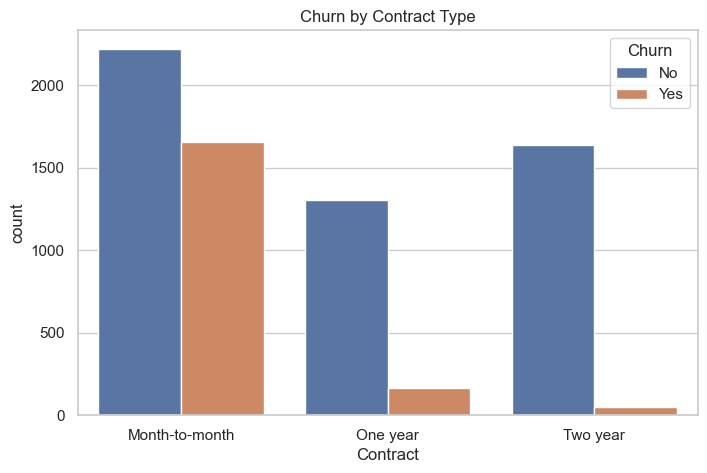

In [7]:
# Relationship between Contract type and Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

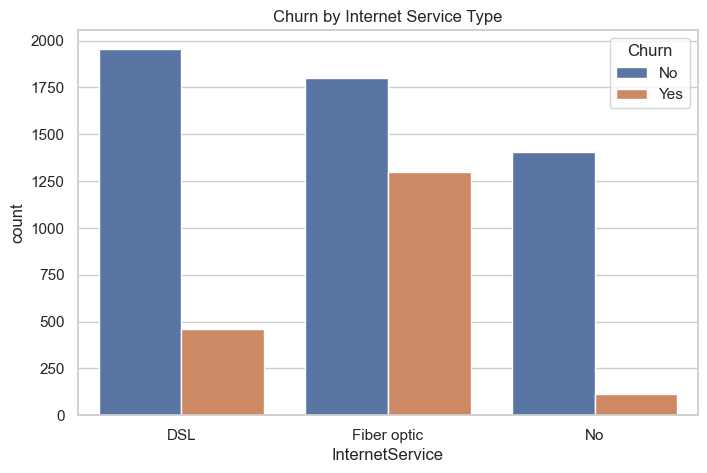

In [8]:
# Relationship between Internet Service and Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()

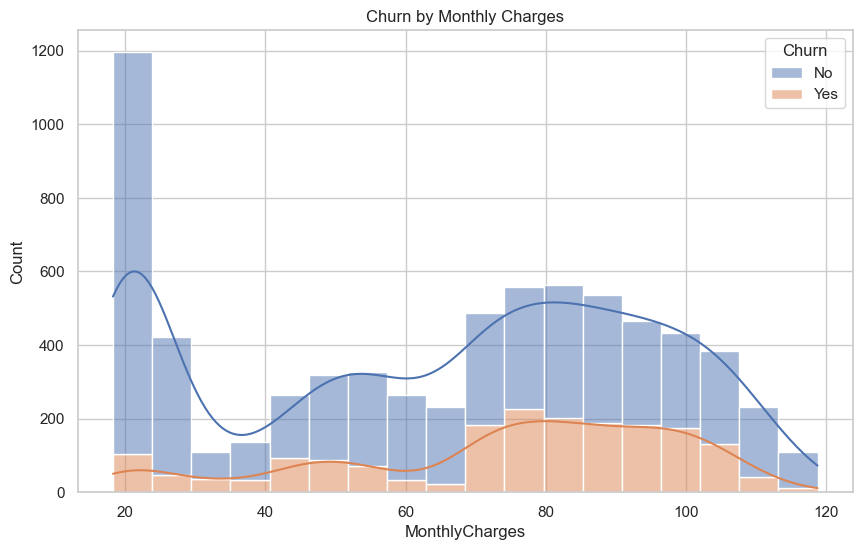

In [9]:
# Relationship between Monthly Charges and Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Churn by Monthly Charges')
plt.show()

In [9]:
# Create a copy to keep the original dataframe safe
df_processed = df.copy()

# Convert the 'Churn' column into 1s and 0s
df_processed['Churn'] = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify all other categorical columns (that are not numbers)
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# Use pandas get_dummies to perform one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# Display the first few rows of the new, processed dataframe
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [10]:
# Separate the features (X) from the target (y)
X = df_processed.drop('Churn', axis=1) # All columns except 'Churn'
y = df_processed['Churn']              # Only the 'Churn' column

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
# random_state ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (5625, 7061)
Testing data shape: (1407, 7061)


In [12]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler ON THE TRAINING DATA ONLY and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using our scaled training data
model.fit(X_train_scaled, y_train)

print("Model training complete!")

Model training complete!


In [14]:
# Use the trained model to make predictions on the scaled test set
predictions = model.predict(X_test_scaled)

# Display the first 10 predictions
print("First 10 predictions:", predictions[:10])

First 10 predictions: [0 0 0 0 0 0 0 1 0 0]


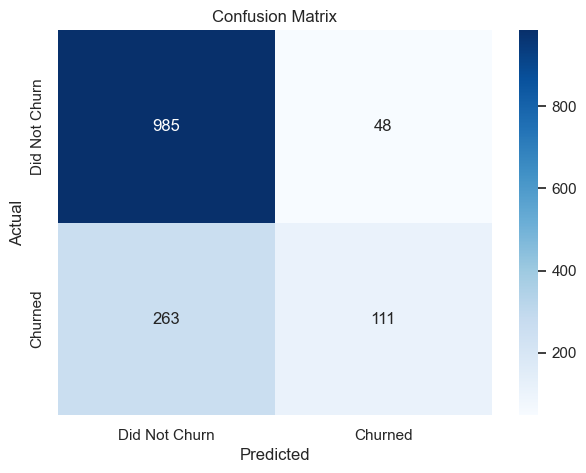

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix with labels
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Print the classification report
print(classification_report(y_test, predictions, target_names=['Did Not Churn', 'Churned']))

               precision    recall  f1-score   support

Did Not Churn       0.79      0.95      0.86      1033
      Churned       0.70      0.30      0.42       374

     accuracy                           0.78      1407
    macro avg       0.74      0.63      0.64      1407
 weighted avg       0.77      0.78      0.74      1407



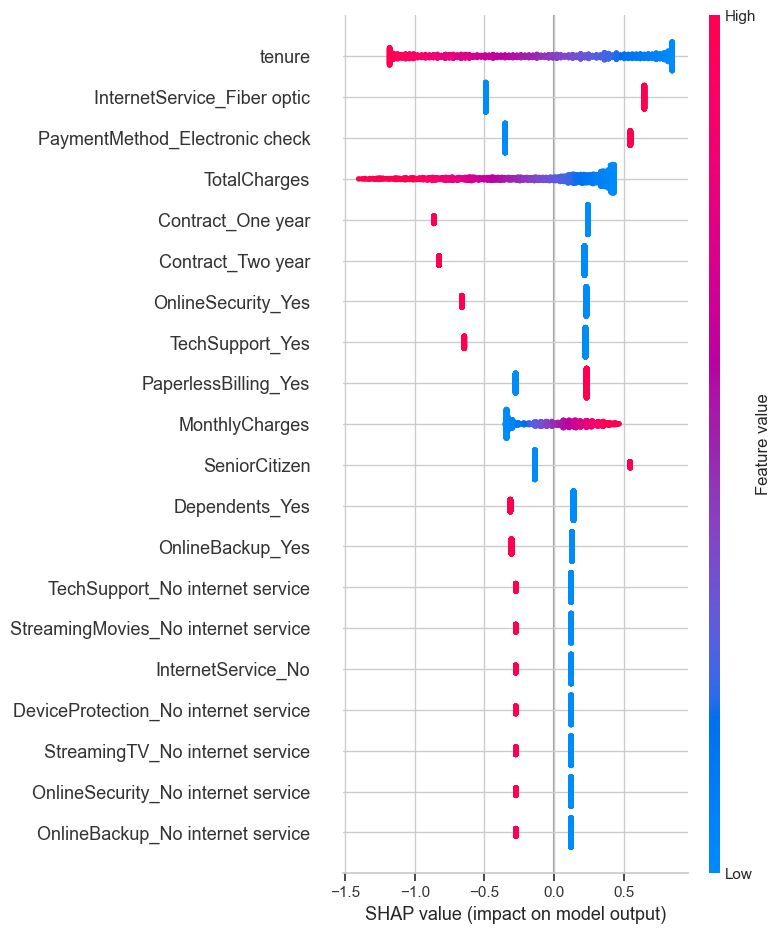

In [17]:
import shap

# Create a SHAP explainer object using our trained model and the training data
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Create the summary plot
# This plot shows the most important features driving the model's predictions
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [19]:
# Get the predicted probabilities for the test set
# The result is an array with two columns: [prob_of_no_churn, prob_of_churn]
probabilities = model.predict_proba(X_test_scaled)

# We are interested in the probability of churn (the second column)
churn_probabilities = probabilities[:, 1]

In [20]:
# Create a new DataFrame to store the results
results_df = pd.DataFrame({
    'Actual_Churn': y_test,
    'Predicted_Churn': predictions,
    'Churn_Probability': churn_probabilities
})

results_df.head()

,Actual_Churn,Predicted_Churn,Churn_Probability
2481,0,0,0.000655
6784,0,0,0.005491
6125,1,0,0.332753
3052,0,0,0.018713
4099,0,0,0.044910


In [21]:
# Define a function to segment customers based on probability
def segment_customer(prob):
    if prob > 0.7:
        return 'At-Risk'
    elif prob > 0.3:
        return 'Could Churn'
    else:
        return 'Loyal'

# Apply the function to the Churn_Probability column
results_df['Segment'] = results_df['Churn_Probability'].apply(segment_customer)

results_df.head()

,Actual_Churn,Predicted_Churn,Churn_Probability,Segment
2481,0,0,0.000655,Loyal
6784,0,0,0.005491,Loyal
6125,1,0,0.332753,Could Churn
3052,0,0,0.018713,Loyal
4099,0,0,0.044910,Loyal


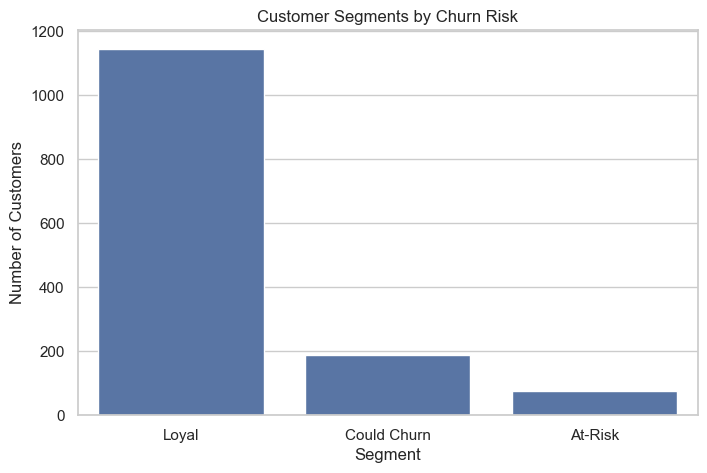

Segment
Loyal          1145
Could Churn     188
At-Risk          74
Name: count, dtype: int64


In [22]:
# Create a count plot to visualize the customer segments
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=results_df, order=['Loyal', 'Could Churn', 'At-Risk'])
plt.title('Customer Segments by Churn Risk')
plt.ylabel('Number of Customers')
plt.show()

# Print the exact counts
print(results_df['Segment'].value_counts())

In [23]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'churn_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
